In [1]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics as me
from sklearn import preprocessing

from numpy.random import normal as normal
import numpy as np

import matplotlib.pyplot as plt

In [2]:
train_data_import = pd.read_csv("../TrainingData/neodata/fault_all_250.csv")
train_data = train_data_import[train_data_import.target.isin([8,9,11,17,19]) == False]
train_data=train_data_import

X=train_data.drop('target',axis=1)       # Training data without targets
target=train_data.get('target')          # Targets

Adding a bit of noise, Does not improve results!

In [3]:
#rows, cols = X.shape
#X = X + normal(0,0.01,(rows,cols))

Tray to standardlize or scale to obatain better results

In [4]:
#scale = preprocessing.StandardScaler()
#scale.fit(X,target)
#X_scaled = scale.transform(X)

## Try LDA out of the box

0.7603280423280423


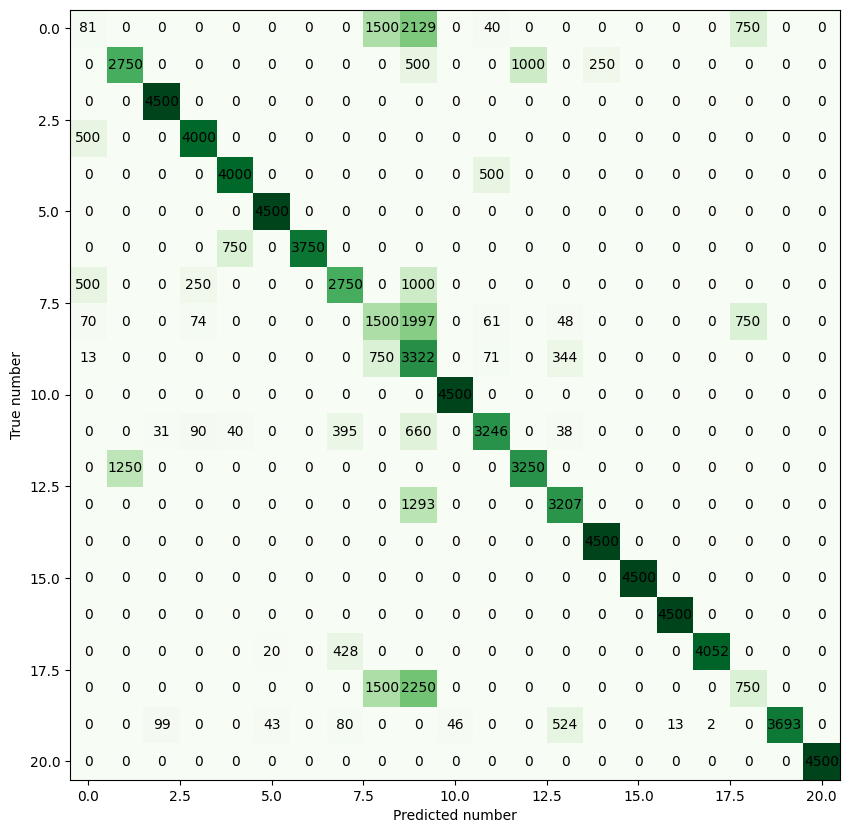

In [5]:
clf = LDA()
clf.fit(X,target)
prediction = clf.predict(X)
conf_matrix = me.confusion_matrix(target,prediction)

fig , axs = plt.subplots(figsize=(10,10))
axs.imshow(conf_matrix,cmap="Greens")
axs.set_xlabel("Predicted number")
axs.set_ylabel("True number")

width, height = conf_matrix.shape

for x in range(width):
    for y in range(height):
        axs.annotate(str(int(conf_matrix[x][y])), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')


#plt.plot(y)
#plt.plot(prediction,'.')
target_np=np.array(target)
correctCount=0
for n in range(len(prediction)):
    if(target_np[n]==prediction[n]):
        correctCount = correctCount + 1     #Clumsy syntax --> Avoid mistakes

print(correctCount/len(prediction))

Do dimensionality reduction to five dimensions

In [6]:
dimReducer = LDA(n_components=5)
dimReducer.fit(X,target)
transformedData=dimReducer.transform(X)     #Dim reduction
print(transformedData)

[[ 0.07845922 -0.13327767 -0.77431139 -0.06839496  0.26217402]
 [ 0.07845705 -0.13327769 -0.774312   -0.06839299  0.26217695]
 [ 0.07845488 -0.1332777  -0.77431261 -0.06839103  0.26217988]
 ...
 [-6.19430811 -8.38713884 -2.88244226 -2.31979057 -3.28934955]
 [-6.19431042 -8.38714046 -2.882441   -2.31979007 -3.2893468 ]
 [-6.19431271 -8.38714207 -2.88243973 -2.31978956 -3.28934405]]


Do classsification in the five dimensions

0.7488571428571429


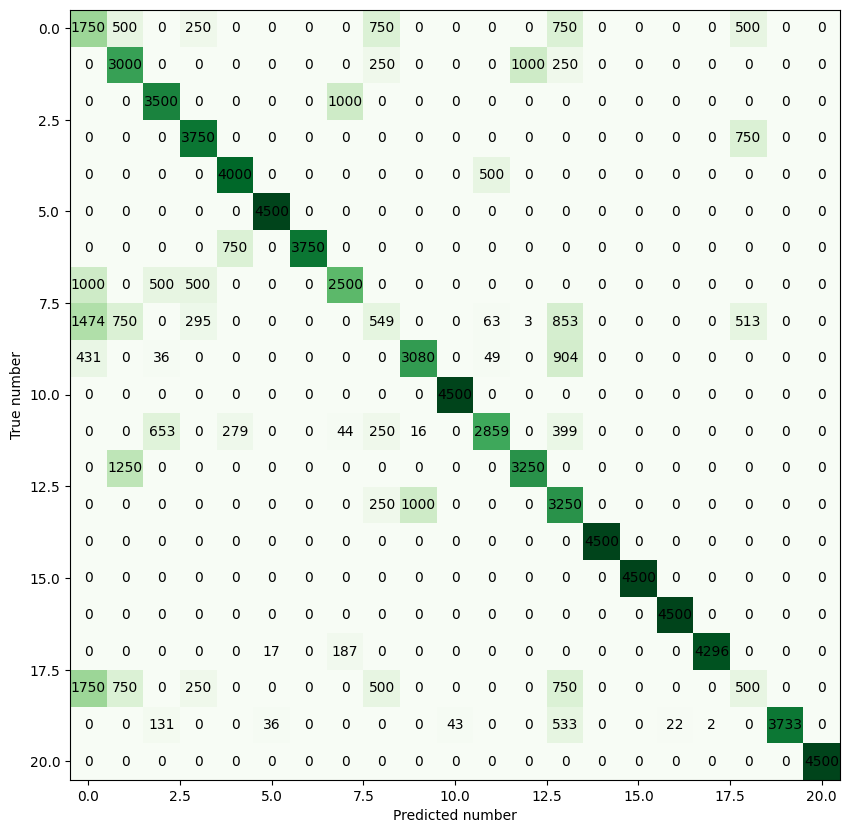

In [7]:
clf.fit(transformedData,target)
prediction5D = clf.predict(transformedData)
conf_matrix = me.confusion_matrix(target,prediction5D)

fig , axs = plt.subplots(figsize=(10,10))
axs.imshow(conf_matrix,cmap="Greens")
axs.set_xlabel("Predicted number")
axs.set_ylabel("True number")

width, height = conf_matrix.shape

for x in range(width):
    for y in range(height):
        axs.annotate(str(int(conf_matrix[x][y])), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

target_np=np.array(target)
correctCount =0
# Calculate accuracy
for n in range(len(prediction5D)):
    if(target_np[n]==prediction5D[n]):
        correctCount = correctCount + 1     #Clumsy syntax --> Avoid mistakes

print(correctCount/len(prediction5D))


0.7708994708994709


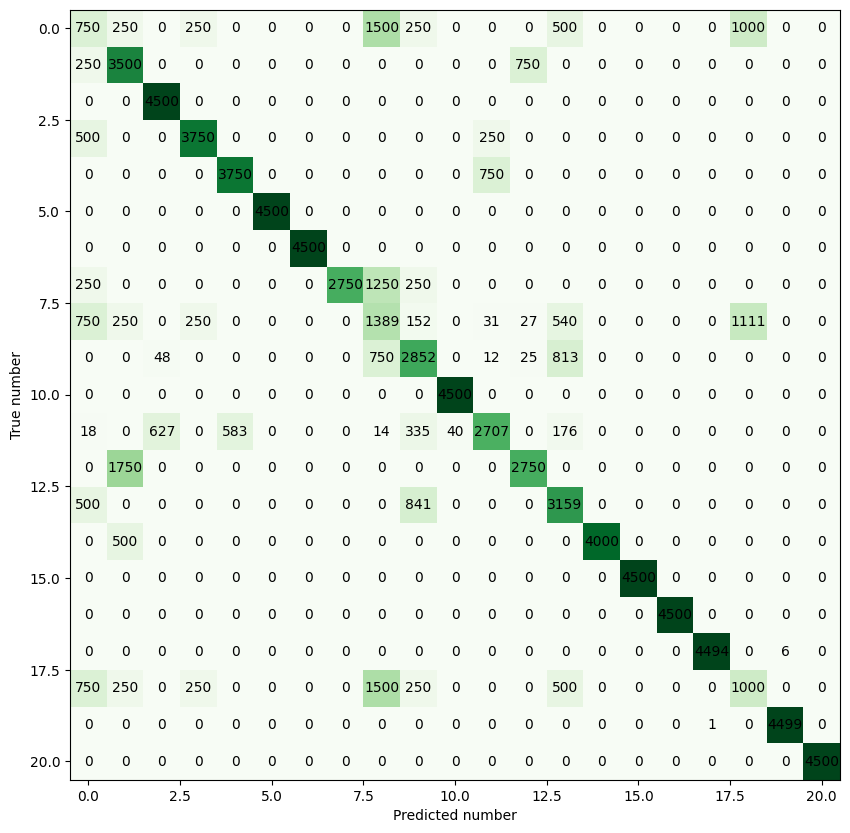

In [9]:
## Try to obtain better results using baysian instad of LDA's build in classification
from sklearn.naive_bayes import GaussianNB

clfGauss = GaussianNB()
clfGauss.fit(transformedData,target)
prediction_Gauss=clfGauss.predict(transformedData)
conf_matrix = me.confusion_matrix(target,prediction_Gauss)

fig , axs = plt.subplots(figsize=(10,10))
axs.imshow(conf_matrix,cmap="Greens")
axs.set_xlabel("Predicted number")
axs.set_ylabel("True number")

width, height = conf_matrix.shape

for x in range(width):
    for y in range(height):
        axs.annotate(str(int(conf_matrix[x][y])), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

target_np=np.array(target)
correctCount =0
# Calculate accuracy
for n in range(len(prediction5D)):
    if(target_np[n]==prediction_Gauss[n]):
        correctCount = correctCount + 1     #Clumsy syntax --> Avoid mistakes

print(correctCount/len(prediction_Gauss))